/usr/lib/python3/dist-packages/pytz/__init__.py:30: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39917 entries, 0 to 39916
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      39917 non-null  int64  
 1   UTC             39917 non-null  object 
 2   Temperature[C]  39917 non-null  float64
 3   Humidity[%]     39917 non-null  float64
 4   TVOC[ppb]       39917 non-null  int64  
 5   eCO2[ppm]       39917 non-null  int64  
 6   Raw H2          39917 non-null  int64  
 7   Raw Ethanol     39917 non-null  int64  
 8   Pressure[hPa]   39917 non-null  float64
 9   PM1.0           39917 non-null  float64
 10  PM2.5           39917 non-null  float64
 11  NC0.5           39917 non-null  float64
 12  NC1.0           39917 non-null  float64
 13  NC2.5           39917 non-null  float64
 14  CNT             39917 non-null  int64  
 15  Fire Alarm      39917 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 4.9+ MB
None
         Unnam

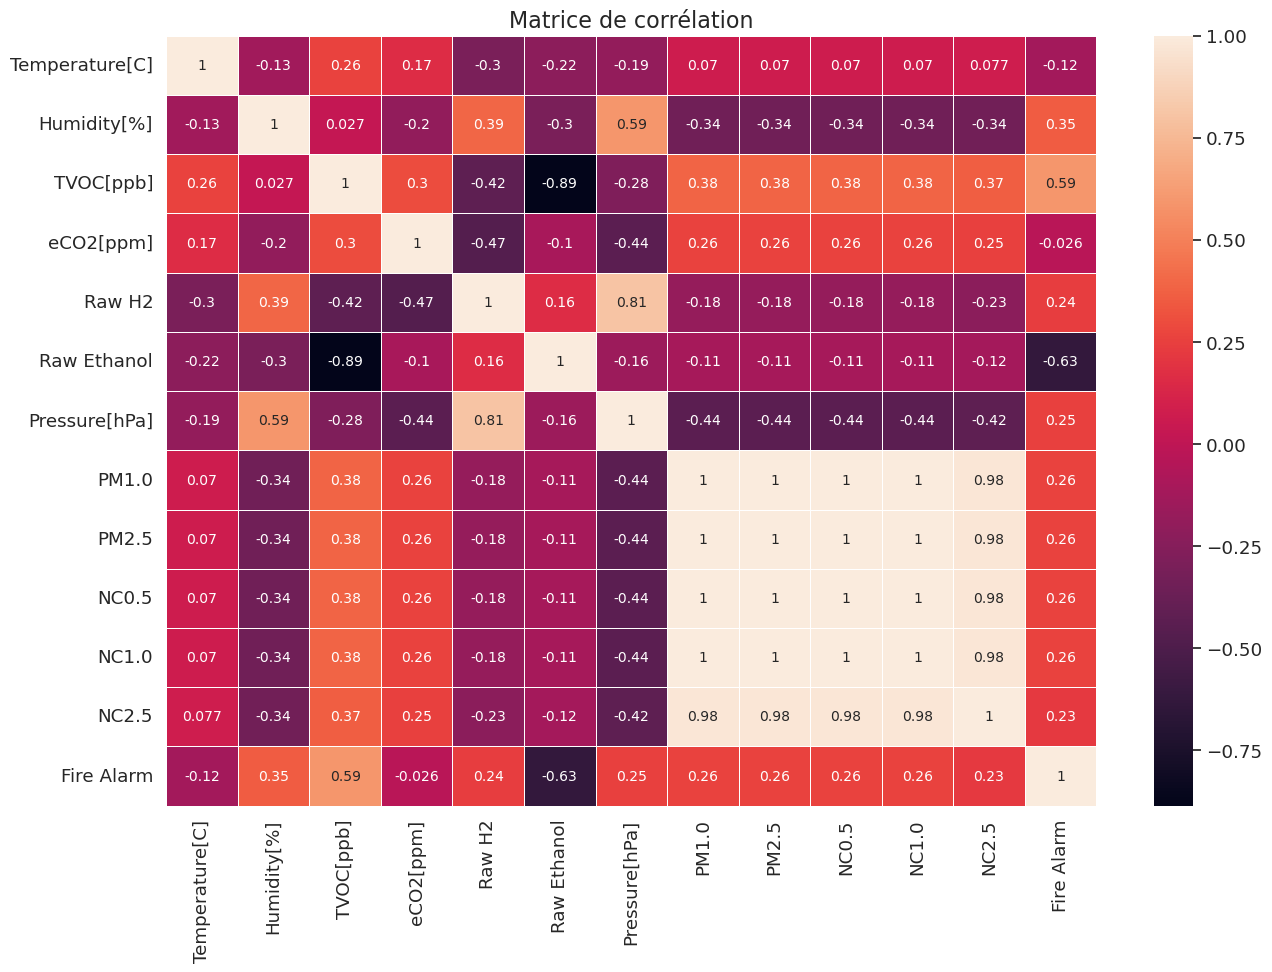

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = pd.read_csv("../data/processed/clean_dataset_.csv")

print(data.info())
print(data.describe())


numerical_cols = ['Temperature[C]','Humidity[%]','TVOC[ppb]','eCO2[ppm]','Raw H2','Raw Ethanol','Pressure[hPa]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5','Fire Alarm']
corr = data[numerical_cols].corr()
plt.figure(figsize=(15, 10))
sns.set_theme(font_scale=1.2)
sns.heatmap(corr, annot=True, annot_kws={"size": 10}, linewidths=0.5)
plt.title("Matrice de corrélation", fontsize=16)  # Augmente la taille du titre
plt.show()






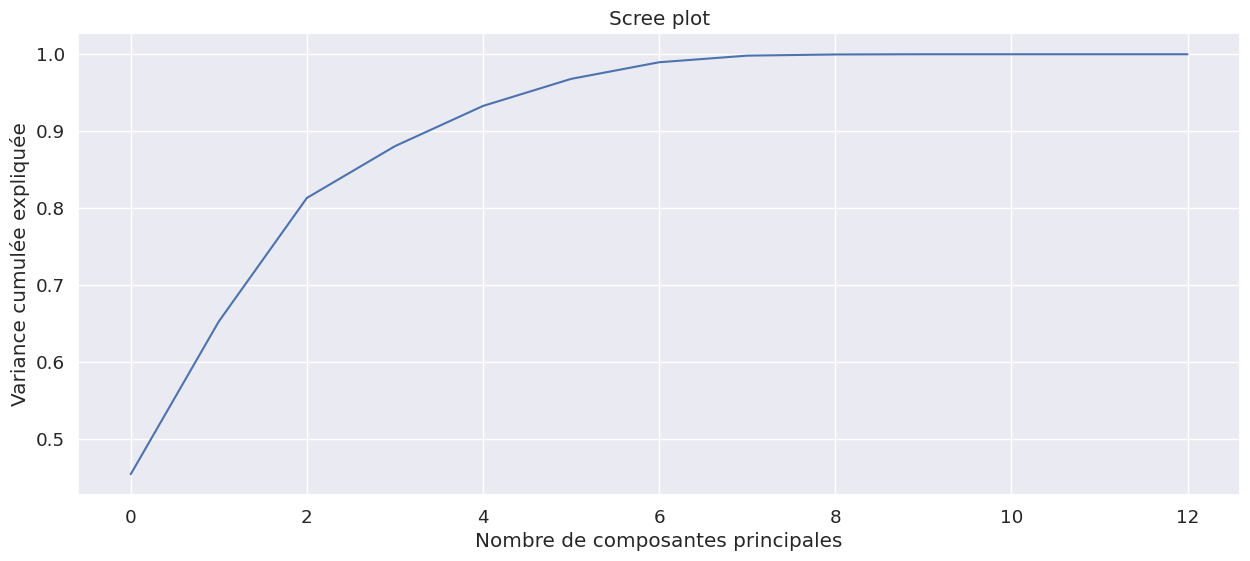

In [2]:
# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_cols])

# ACP - Calcul de toutes les composantes
pca = PCA()
principalComponents = pca.fit_transform(data_scaled)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(15, 6))
plt.plot(np.cumsum(explained_variance))

plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.title('Scree plot')
plt.show()


In [4]:


# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_cols])

# ACP - Choix du nombre de composantes
n_components = 3  # Vous pouvez modifier cette valeur

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(data_scaled)

# Variance expliquée
variance_ratio = pca.explained_variance_ratio_
s= 0
# Analyse de la variance expliquée
print("Pourcentage de variance expliquée par chaque composante principale :")
for i, ratio in enumerate(variance_ratio):
    print(f"Composante {i+1} : {ratio:.4f}")
    s += ratio

print(s)
print(1-s)

newComponent = pd.DataFrame(principalComponents, columns=["Composante1","Composante2","Composante3"])
newComponent.to_csv("../data/processed/principalComponents_.csv", index=False)
principalComponents


Pourcentage de variance expliquée par chaque composante principale :
Composante 1 : 0.4539
Composante 2 : 0.1986
Composante 3 : 0.1606
0.8131205120292204
0.18687948797077958


array([[-3.52976192, -0.76691736, -1.9765907 ],
       [-3.52491966, -0.79194192, -1.96200547],
       [-3.52840319, -0.84238757, -1.96672014],
       ...,
       [ 1.91197448, -3.48104213,  1.94761134],
       [ 1.77368116, -3.46939569,  1.96442916],
       [ 1.4555157 , -3.45913186,  1.93539586]])